# 개별 코드 

In [1]:
# 데이터 불러오기
from sklearn import datasets

raw_wine = datasets.load_wine()

In [2]:
# 피쳐, 타겟 데이터 지정
X = raw_wine.data
y = raw_wine.target

In [3]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=1)

In [4]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
std_scale.fit(X_tn)

X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [5]:
# PCA 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_tn_std)

X_tn_pca = pca.transform(X_tn_std)
X_te_pca = pca.transform(X_te_std)

In [6]:
# 차원축소 확인
print(X_tn_std.shape)
print(X_tn_pca.shape)

(133, 13)
(133, 2)


In [7]:
# 공분산 행렬 확인
print(pca.get_covariance())

[[ 1.06244198  0.05588975  0.29643474 -0.14674317  0.38769443  0.25079577
   0.19779094 -0.10070718  0.17126277  0.44742545 -0.12013532  0.02879752
   0.50505224]
 [ 0.05588975  0.86510155  0.11906446  0.23837434  0.00721146 -0.39785163
  -0.4503856   0.31716671 -0.30728109  0.30100181 -0.42357315 -0.45825394
  -0.14345856]
 [ 0.29643474  0.11906446  0.72597065 -0.01380654  0.20891722  0.02618151
  -0.01633577  0.03209892  0.00824227  0.32033554 -0.17879769 -0.10868048
   0.2307792 ]
 [-0.14674317  0.23837434 -0.01380654  0.77557799 -0.13456582 -0.4028355
  -0.42487887  0.28525095 -0.30301432  0.07431753 -0.28885443 -0.36992936
  -0.2952175 ]
 [ 0.38769443  0.00721146  0.20891722 -0.13456582  0.82428285  0.22898335
   0.19490044 -0.10843832  0.16009666  0.30262412 -0.0453494   0.06951315
   0.39222323]
 [ 0.25079577 -0.39785163  0.02618151 -0.4028355   0.22898335  1.21144743
   0.7122459  -0.47784458  0.50827447 -0.11953458  0.48155509  0.61862946
   0.49873766]
 [ 0.19779094 -0.450385

In [8]:
# 고유값 확인
print(pca.singular_values_)

[24.81797394 18.31760391]


In [9]:
# 고유벡터 확인
print(pca.components_)

[[-0.10418545  0.25670612  0.01387486  0.23907587 -0.10470229 -0.4007005
  -0.42902734  0.29111343 -0.30307602  0.12127653 -0.31609521 -0.38729685
  -0.26283936]
 [-0.49018724 -0.1691503  -0.30746987  0.04459018 -0.34837302 -0.07966456
  -0.0133774  -0.02498633 -0.0415164  -0.50798383  0.26045807  0.14018631
  -0.39850143]]


In [10]:
# 설명된 분산
print(pca.explained_variance_)

[4.66615023 2.54192889]


In [11]:
# 설명된 분산 비율
print(pca.explained_variance_ratio_)

[0.35623588 0.19406282]


In [12]:
# 차원축소 데이터 확인
import pandas as pd

pca_columns = ['pca_comp1', 'pca_comp2']
X_tn_pca_df = pd.DataFrame(X_tn_pca, 
                           columns=pca_columns)
X_tn_pca_df['target'] = y_tn
X_tn_pca_df.head(5)

,pca_comp1,pca_comp2,target
0,-2.231848,-0.148603,0
1,-1.364444,0.422617,1
2,-1.918072,-2.014682,0
3,-3.539272,-2.878394,0
4,-3.182320,-2.020041,0


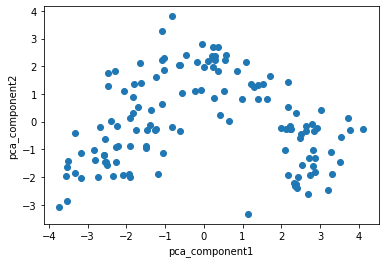

In [13]:
# 라벨 미적용 PCA 데이터
import matplotlib.pyplot as plt

plt.scatter(X_tn_pca_df['pca_comp1'],
            X_tn_pca_df['pca_comp2'], 
            marker='o')

plt.xlabel('pca_component1')
plt.ylabel('pca_component2')

plt.show()

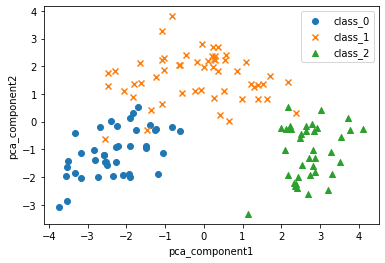

In [14]:
# 라벨 적용 PCA 플랏
df = X_tn_pca_df
df_0 = df[df['target']==0]
df_1 = df[df['target']==1]
df_2 = df[df['target']==2]

X_11 = df_0['pca_comp1']
X_12 = df_1['pca_comp1']
X_13 = df_2['pca_comp1']

X_21 = df_0['pca_comp2']
X_22 = df_1['pca_comp2']
X_23 = df_2['pca_comp2']

target_0 = raw_wine.target_names[0]
target_1 = raw_wine.target_names[1]
target_2 = raw_wine.target_names[2]

plt.scatter(X_11, X_21, 
            marker='o', 
            label=target_0)
plt.scatter(X_12, X_22, 
            marker='x', 
            label=target_1)
plt.scatter(X_13, X_23, 
            marker='^', 
            label=target_2)

plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()

plt.show()

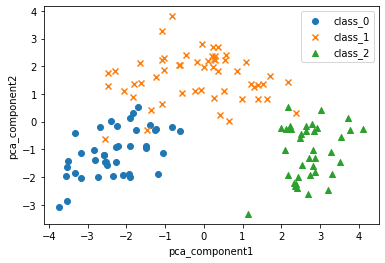

In [15]:
# 반복문을 이용해 PCA 플랏
df = X_tn_pca_df
markers=['o','x','^']

for i, mark in enumerate(markers):
    df_i = df[df['target']== i]
    target_i = raw_wine.target_names[i]
    X1 = df_i['pca_comp1']
    X2 = df_i['pca_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()

In [16]:
# PCA 적용 전/후 예측 정확도 비교

In [17]:
# PCA 적용 전 예측 정확도
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=2, 
                                random_state=0)
clf_rf.fit(X_tn_std, y_tn)

# 예측
pred_rf = clf_rf.predict(X_te_std)

In [18]:
# PCA 적용 전 정확도
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.9777777777777777


In [19]:
# PCA 적용 후 학습
# 학습
from sklearn.ensemble import RandomForestClassifier

clf_rf_pca = RandomForestClassifier(max_depth=2, 
                                    random_state=0)
clf_rf_pca.fit(X_tn_pca, y_tn)

# 예측
pred_rf_pca = clf_rf_pca.predict(X_te_pca)

In [20]:
# PCA 적용 후 정확도
from sklearn.metrics import accuracy_score

accuracy_pca = accuracy_score(y_te, pred_rf_pca)
print(accuracy_pca)

0.9555555555555556


# 통합 코드

(133, 13)
(133, 2)
[[ 1.06244198  0.05588975  0.29643474 -0.14674317  0.38769443  0.25079577
   0.19779094 -0.10070718  0.17126277  0.44742545 -0.12013532  0.02879752
   0.50505224]
 [ 0.05588975  0.86510155  0.11906446  0.23837434  0.00721146 -0.39785163
  -0.4503856   0.31716671 -0.30728109  0.30100181 -0.42357315 -0.45825394
  -0.14345856]
 [ 0.29643474  0.11906446  0.72597065 -0.01380654  0.20891722  0.02618151
  -0.01633577  0.03209892  0.00824227  0.32033554 -0.17879769 -0.10868048
   0.2307792 ]
 [-0.14674317  0.23837434 -0.01380654  0.77557799 -0.13456582 -0.4028355
  -0.42487887  0.28525095 -0.30301432  0.07431753 -0.28885443 -0.36992936
  -0.2952175 ]
 [ 0.38769443  0.00721146  0.20891722 -0.13456582  0.82428285  0.22898335
   0.19490044 -0.10843832  0.16009666  0.30262412 -0.0453494   0.06951315
   0.39222323]
 [ 0.25079577 -0.39785163  0.02618151 -0.4028355   0.22898335  1.21144743
   0.7122459  -0.47784458  0.50827447 -0.11953458  0.48155509  0.61862946
   0.49873766]
 [ 0

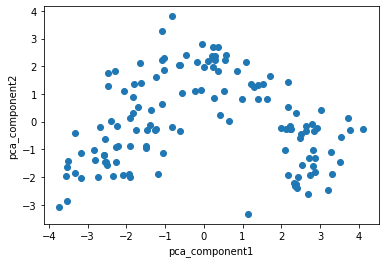

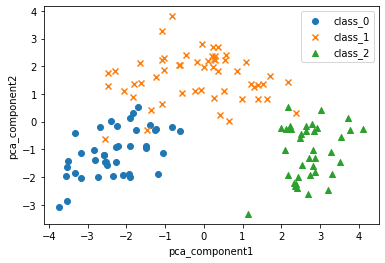

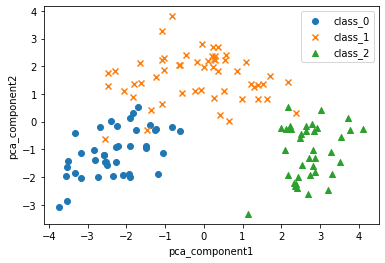

0.9777777777777777
0.9555555555555556


In [21]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기
raw_wine = datasets.load_wine()

# 피쳐, 타겟 데이터 지정
X = raw_wine.data
y = raw_wine.target

# 트레이닝/테스트 데이터 분할
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=1)

# 데이터 표준화
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

# PCA 
pca = PCA(n_components=2)
pca.fit(X_tn_std)
X_tn_pca = pca.transform(X_tn_std)
X_te_pca = pca.transform(X_te_std)

# 차원축소 확인
print(X_tn_std.shape)
print(X_tn_pca.shape)

# 공분산 행렬 확인
print(pca.get_covariance())

# 고유값 확인
print(pca.singular_values_)

# 고유벡터 확인
print(pca.components_)

# 설명된 분산
print(pca.explained_variance_)

# 설명된 분산 비율
print(pca.explained_variance_ratio_)


# 데이터프레임 생성
pca_columns = ['pca_comp1', 'pca_comp2']
X_tn_pca_df = pd.DataFrame(X_tn_pca, 
                           columns=pca_columns)
X_tn_pca_df['target'] = y_tn
X_tn_pca_df.head(5)


# 라벨 미적용 PCA 데이터
plt.scatter(X_tn_pca_df['pca_comp1'],
            X_tn_pca_df['pca_comp2'], 
            marker='o')
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.show()

# 라벨 적용 PCA 플랏
df = X_tn_pca_df
df_0 = df[df['target']==0]
df_1 = df[df['target']==1]
df_2 = df[df['target']==2]

X_11 = df_0['pca_comp1']
X_12 = df_1['pca_comp1']
X_13 = df_2['pca_comp1']

X_21 = df_0['pca_comp2']
X_22 = df_1['pca_comp2']
X_23 = df_2['pca_comp2']

target_0 = raw_wine.target_names[0]
target_1 = raw_wine.target_names[1]
target_2 = raw_wine.target_names[2]

plt.scatter(X_11, X_21, 
            marker='o', 
            label=target_0)
plt.scatter(X_12, X_22, 
            marker='x', 
            label=target_1)
plt.scatter(X_13, X_23, 
            marker='^', 
            label=target_2)
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()

# 반복문을 이용해 PCA 플랏
df = X_tn_pca_df
markers=['o','x','^']

for i, mark in enumerate(markers):
    df_i = df[df['target']== i]
    target_i = raw_wine.target_names[i]
    X1 = df_i['pca_comp1']
    X2 = df_i['pca_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()

# PCA 적용 전/후 예측 정확도 비교
# PCA 적용 전 예측 정확도
clf_rf = RandomForestClassifier(max_depth=2, 
                                random_state=0)
clf_rf.fit(X_tn_std, y_tn)

# 예측
pred_rf = clf_rf.predict(X_te_std)

# PCA 적용 전 정확도
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

# PCA 적용 후 학습
clf_rf_pca = RandomForestClassifier(max_depth=2, 
                                    random_state=0)
clf_rf_pca.fit(X_tn_pca, y_tn)

# 예측
pred_rf_pca = clf_rf_pca.predict(X_te_pca)

# PCA 적용 후 정확도
accuracy_pca = accuracy_score(y_te, pred_rf_pca)
print(accuracy_pca)